<a href="https://colab.research.google.com/github/JdavidRamirez/colombia-unemployment-prediction/blob/main/Unemployment_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tracking and Predicting Colombia’s Unemployment Rate (2020–2028)

This project analyzes the unemployment rate in Colombia from 2016 to 2022 to understand how it has changed over time. It includes a visual comparison with other Latin American countries and concludes by applying a Polynomial Regression model to predict the unemployment rate in Colombia through 2027.

# 1. Data transformation and cleaning

In [1]:
# Loading in required libraries
# Reading in the World Development Indicators
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vReENF4cqCorYfjuYnHRgRp4K04mXMRrXXasc0Zo_Bi7yXJ5fqZtIyGxdcXAqaydEmTU_ZU4Ym1OiQX/pub?output=csv",skiprows=4)


In [2]:
# data cleaning and dropping innecesaries columns
df.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)


In [3]:
#data filtering only for latin America Countries

data=df[df['Country Name'].isin(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador','Paraguay', 'Peru','Uruguay', 'Venezuela'])]
data.reset_index(drop=True, inplace=True)

In [4]:
#Pivoting the Table – Countries as Columns, Years as Categories

df1=data.melt(id_vars=['Country Name'], var_name='Year', value_name='Unemployment rate')


In [6]:
# Changing the type of the column year for int
df1['Year']=df1['Year'].astype(int)

In [7]:
#Filtering column year for the last 20 years
df2=df1[df1["Year"]>=2000]
df2.reset_index(drop=True, inplace=True)


#2. How Has Unemployment Evolved Across Latin America Since 2000?

Since 2000, the unemployment rate has shown greater variability in countries like Colombia, Argentina, and Brazil, marked by significant fluctuations over the years. In contrast, countries such as Bolivia, Paraguay, and Peru have experienced more stable unemployment trends. A particularly notable event occurred in 2020, when all countries in the region experienced a sharp spike in unemployment, coinciding with the economic crisis triggered by the COVID-19 pandemic, which caused widespread disruptions to labor markets across Latin America.

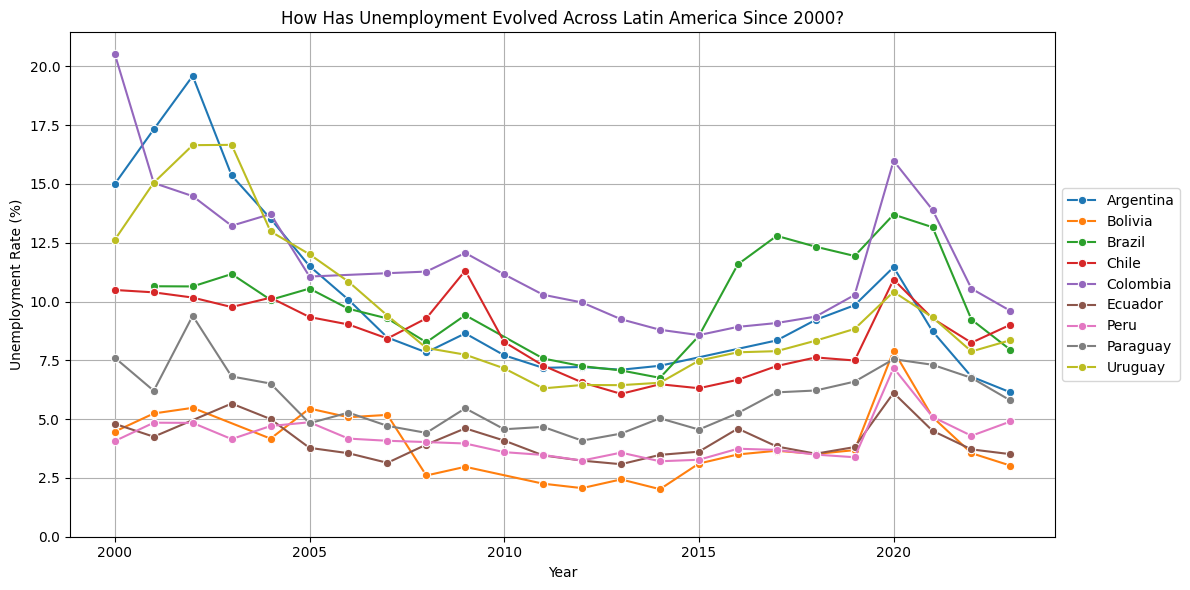

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=df2, x='Year', y='Unemployment rate', hue='Country Name', marker='o')
plt.title('How Has Unemployment Evolved Across Latin America Since 2000?')
plt.ylabel('Unemployment Rate (%)')
plt.ylim(0)  # Start y-axis from 0
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


Colombia has had the highest average unemployment rate over the last 20 years, followed by Argentina and Brazil, highlighting persistent labor market challenges in these countries compared to others in the region.

In [9]:
#Displaying the Average Unemployment Rate Across the Last 20 Years
df2.groupby('Country Name')['Unemployment rate'].mean().sort_values(ascending=False)

,Unemployment rate
Country Name,
Colombia,11.664348
Argentina,10.198136
Brazil,9.982091
Uruguay,9.635875
Chile,8.578125
Paraguay,5.839125
Peru,4.160667
Ecuador,4.056087
Bolivia,3.929909


#3. Which countries have recovered the most since 2020?

Despite having one of the highest unemployment rates, Colombia has shown the strongest recovery since the economic crisis caused by the COVID-19 pandemic, with a significant drop in unemployment following the 2020 peak.

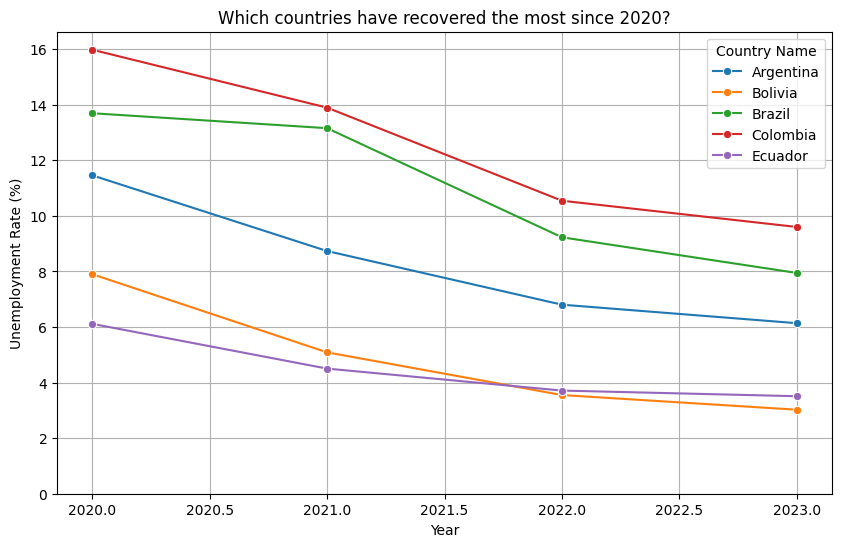

In [10]:
# Calculate rate difference from 2020 to 2023
df_start = df2[df2['Year'] ==2020].set_index('Country Name')
df_end = df2[df2['Year'] == 2023].set_index('Country Name')
df_data=df2[df2['Year']>=2020]
growth = ((df_end['Unemployment rate'] - df_start['Unemployment rate'])/3).dropna()
top_5 = growth.sort_values().head().index

df_top5 = df_data[df_data['Country Name'].isin(top_5)]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_top5, x='Year', y='Unemployment rate', hue='Country Name', marker='o')
plt.title("Which countries have recovered the most since 2020?")
plt.ylabel('Unemployment Rate (%)')
plt.ylim(0)  # Start y-axis from 0
plt.grid(True)
plt.show()

Between 2020 and 2023, the average annual decrease in unemployment rate shows that Colombia experienced the strongest recovery in the region, with an average drop of 2.13 percentage points per year. This is followed by:

Brazil: –1.92

Argentina: –1.77

Bolivia: –1.63

Ecuador: –0.87

This suggests that, despite historically high unemployment rates, Colombia made the fastest and most consistent progress in reducing unemployment in the three years following the COVID-19 crisis.



In [11]:
#Calculating Average Annual Change in Unemployment Rate (2020–2023)
growth = ((df_end['Unemployment rate'] - df_start['Unemployment rate'])/3).dropna()
growth.sort_values()

,Unemployment rate
Country Name,
Colombia,-2.126667
Brazil,-1.916667
Argentina,-1.774000
Bolivia,-1.626333
Ecuador,-0.868667
Peru,-0.760000
Uruguay,-0.686000
Chile,-0.640333
Paraguay,-0.584667


# 4. Is unemployment improving in Colombia since 2020?

Yes, the chart shows that unemployment in Colombia has mostly declined since 2000. The unemployment rate started high, over 20%, and slowly decreased over the next few years to reach its lowest point in 2015. There was a big spike in 2020, probably because of the COVID-19 pandemic. After that, it started to decrease again and shows signs of recovery. Overall, the trend shows improvement, even with some ups and downs.

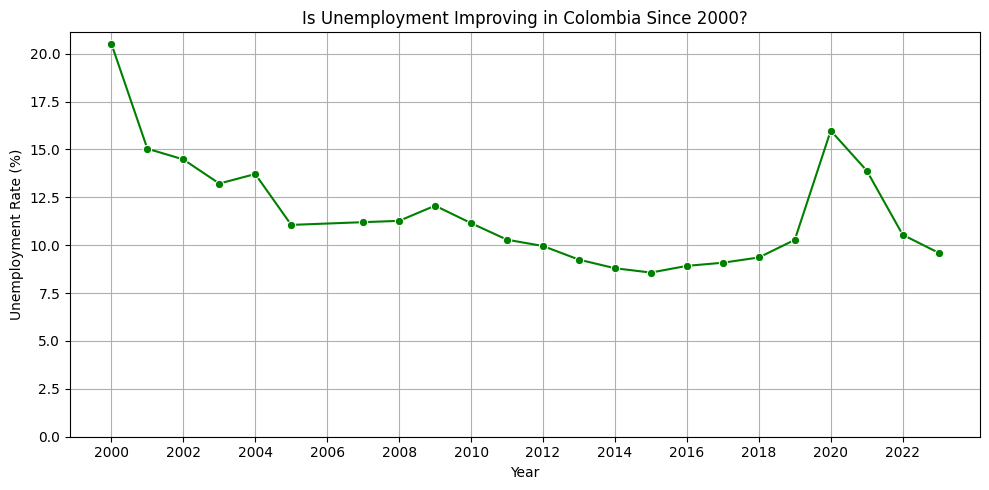

In [12]:
# Plot unemployment trend
# Filter Colombia's data
colombia_df = df2[df2['Country Name'] == 'Colombia']
plt.figure(figsize=(10, 5))
sns.lineplot(data=colombia_df, x='Year', y='Unemployment rate', marker='o', color='green')
plt.title("Is Unemployment Improving in Colombia Since 2000?")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.xticks(colombia_df['Year'][::2])  # Show every other year for clarity
plt.ylim(0)  # Start y-axis from 0
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
#Filtering only colombia data
colombia=df2[df2["Country Name"]=="Colombia"]
colombia.reset_index(drop=True,inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       24 non-null     object 
 1   Year               24 non-null     int64  
 2   Unemployment rate  23 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 708.0+ bytes


In [29]:
# Adding a new data
new_rate=10.2
new_row = pd.DataFrame([{'Country Name':'Colombia','Year':2024,'Unemployment rate':new_rate}])
colombia = pd.concat([colombia, new_row], ignore_index=True)


,Country Name,Year,Unemployment rate,Type
0,Colombia,2000,20.520,Actual
1,Colombia,2001,15.040,Actual
2,Colombia,2002,14.481,Actual
3,Colombia,2003,13.221,Actual
4,Colombia,2004,13.717,Actual
5,Colombia,2005,11.062,Actual
6,Colombia,2007,11.204,Actual
7,Colombia,2008,11.273,Actual
8,Colombia,2009,12.066,Actual
9,Colombia,2010,11.153,Actual


# 5. Will the unemployment rate in Colombia continue to decline between 2024 and 2028?

 According to the model's predictions, the unemployment rate is expected to gradually decrease from 10.2% in 2024 to 9.4% in 2028, suggesting a slow but steady improvement in employment conditions.

In [30]:
# Making prediction for the next 5 years
from sklearn.linear_model import LinearRegression

#Dropping missing data
colombia= colombia.dropna()

# Features (X) and target (y)
X = colombia['Year'].values.reshape(-1, 1)
y = colombia['Unemployment rate'].values

#Applying a Polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Try a 2nd or 3rd degree polynomial
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X, y)

#Predicting the existed data
poly_preds = poly_model.predict(X)

# setting the Future years
future_years = np.array(range(2025, 2029)).reshape(-1, 1)
future_preds = poly_model.predict(future_years)

# Predicting  future values
future_preds_poly = poly_model.predict(future_years)

# Add to DataFrame
df_poly = pd.DataFrame({
    'Country Name':'Colombia',
    'Year': future_years.flatten(),
    'Unemployment rate': future_preds_poly,
    'Type': 'Polynomial Prediction'
})


In [40]:
# Displaying the Future prediction
df_poly


,Country Name,Year,Unemployment rate,Type
0,Colombia,2025,10.771353,Polynomial Prediction
1,Colombia,2026,10.439785,Polynomial Prediction
2,Colombia,2027,9.980237,Polynomial Prediction
3,Colombia,2028,9.378683,Polynomial Prediction


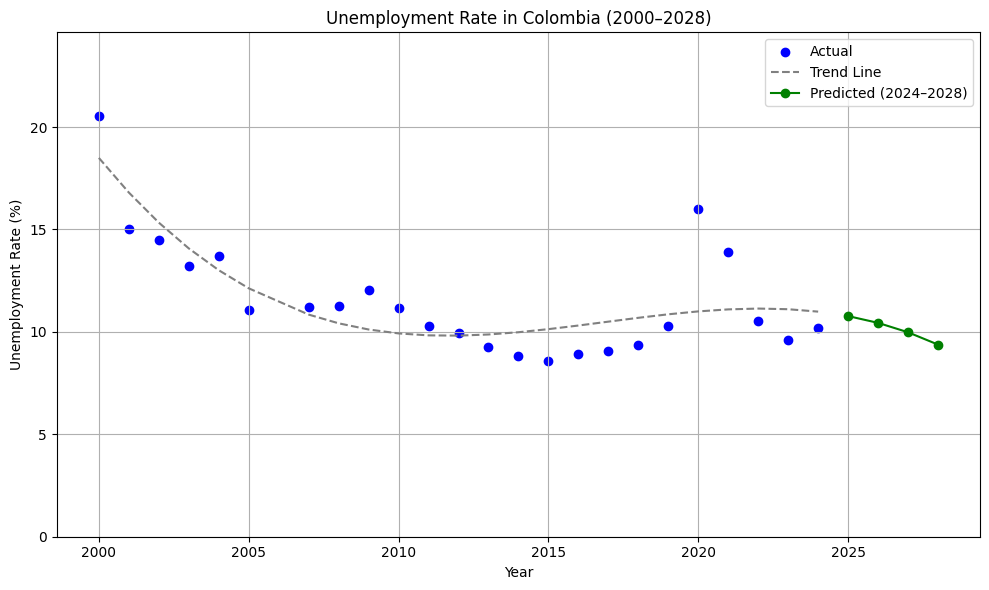

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(colombia['Year'], colombia['Unemployment rate'], label="Actual", color='blue')
plt.plot(colombia['Year'], poly_model.predict(X), label="Trend Line", color='gray', linestyle='--')
plt.plot(future_years, future_preds_poly, label="Predicted (2024–2028)", color='green', marker='o')
#plt.plot(colombia['Year'], poly_preds, label="Predicted", color='Red', marker='o')
plt.title("Unemployment Rate in Colombia (2000–2028)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.ylim(0, max(y)*1.2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6. Model performance

The polynomial regression model (degree 3) achieved a Mean Absolute Error (MAE) of 1.5% and explained approximately 66% of the variability in Colombia's unemployment rate from 2000 to 2023. While the model captures the general trend effectively, it underperforms during atypical periods such as the COVID-19 pandemic (2020–2021). Overall, the model provides a reasonably good fit for forecasting under normal economic conditions.

In [39]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(colombia['Unemployment rate'], poly_model.predict(X))
r2 = r2_score(colombia['Unemployment rate'], poly_model.predict(X))
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.62
R-squared: 0.6630307954638326
